In [2]:
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#from sklearn.cross_validation import KFold 
    
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data =pd.read_csv('C:/Users/arifa/Desktop/AI FINAL PROJECT/A203/dataset.csv')
data


,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
299,Female,17,5,5,7,6,4,serious
300,Male,20,6,6,5,4,5,serious
301,Male,18,6,3,1,4,6,lively
302,Female,19,3,5,3,5,4,serious


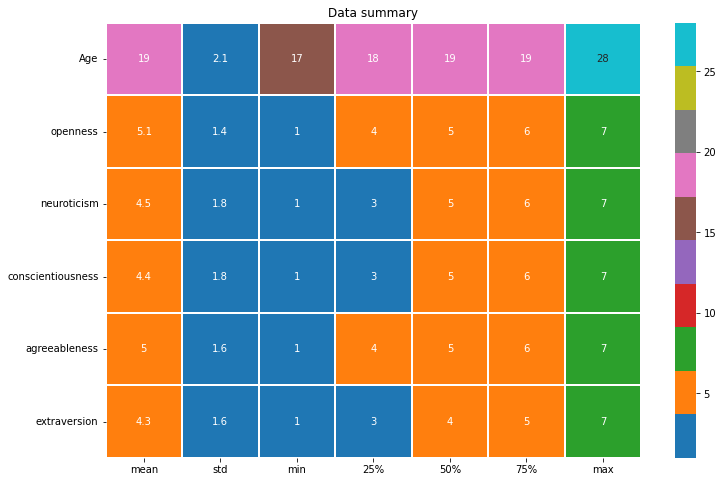

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.588816,19.213816,5.148026,4.463816,4.388158,4.953947,4.276316
std,0.492860,2.059432,1.407592,1.762838,1.783864,1.605843,1.629746
min,0.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,18.000000,4.000000,3.000000,3.000000,4.000000,3.000000
50%,1.000000,19.000000,5.000000,5.000000,5.000000,5.000000,4.000000
75%,1.000000,19.000000,6.000000,6.000000,6.000000,6.000000,5.000000
max,1.000000,28.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [4]:
clean_data = {'Gender' : {'Male' :0, 'Female' : 1}}
data_copy = data.copy()
data_copy.replace(clean_data, inplace = True)
plt.figure(figsize=(12,8))
sns.heatmap(data.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("tab10"))
plt.title("Data summary")
plt.show()
data_copy.describe()


In [5]:
data['Personality (Class label)'].value_counts().sort_values()

dependable     56
lively         56
responsible    57
extraverted    67
serious        68
Name: Personality (Class label), dtype: int64

In [6]:
data_pre = data_copy.copy()
X = data_pre.drop('Personality (Class label)',axis=1)
y = data_pre['Personality (Class label)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (243, 7)
Size of y_train :  (243,)
Size of X_test :  (61, 7)
Size of Y_test :  (61,)


In [7]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(y_pred_knn)
knn.score(X_test,y_test)

['dependable' 'serious' 'lively' 'responsible' 'extraverted' 'dependable'
 'serious' 'lively' 'dependable' 'lively' 'serious' 'lively' 'serious'
 'dependable' 'responsible' 'serious' 'serious' 'serious' 'extraverted'
 'responsible' 'serious' 'extraverted' 'serious' 'responsible'
 'extraverted' 'dependable' 'serious' 'serious' 'dependable' 'dependable'
 'dependable' 'dependable' 'extraverted' 'responsible' 'extraverted'
 'extraverted' 'extraverted' 'lively' 'lively' 'serious' 'extraverted'
 'extraverted' 'serious' 'lively' 'extraverted' 'dependable' 'lively'
 'extraverted' 'serious' 'extraverted' 'serious' 'lively' 'dependable'
 'serious' 'extraverted' 'lively' 'extraverted' 'dependable' 'extraverted'
 'dependable' 'dependable']


0.18032786885245902

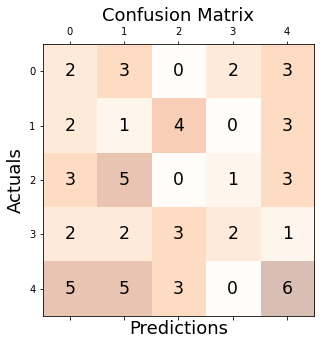

Recall: 0.180
Precision: 0.180
F1 Score: 0.180
Accuracy: 0.180


In [31]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Recall: %.3f' % recall_score(y_test, y_pred_knn,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred_knn,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_knn,average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))

In [58]:
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
mul_lr.fit(X_train, y_train)
mul_lr.score(X_train, y_train)
y_pred_logistic=mul_lr.predict(X_test)
print(y_pred_logistic)
mul_lr.score(X_test,y_test)

['extraverted' 'responsible' 'lively' 'responsible' 'serious'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'serious'
 'lively' 'serious' 'extraverted' 'lively' 'serious' 'extraverted'
 'responsible' 'extraverted' 'extraverted' 'responsible' 'lively' 'lively'
 'extraverted' 'lively' 'extraverted' 'extraverted' 'serious'
 'extraverted' 'lively' 'lively' 'extraverted' 'serious' 'extraverted'
 'serious' 'extraverted' 'extraverted' 'extraverted' 'extraverted'
 'lively' 'lively' 'serious' 'lively' 'responsible' 'lively' 'extraverted'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'responsible'
 'extraverted' 'serious' 'extraverted' 'extraverted' 'extraverted'
 'serious' 'lively' 'responsible' 'extraverted' 'extraverted' 'serious']


0.19672131147540983

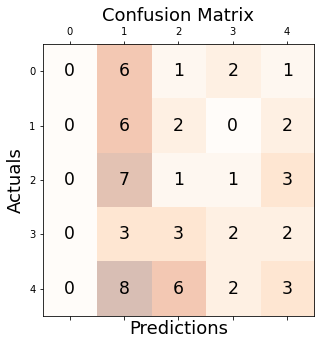

Recall: 0.197
Precision: 0.197
F1 Score: 0.197
Accuracy: 0.197


In [57]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_logistic)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Recall: %.3f' % recall_score(y_test, y_pred_logistic,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred_logistic,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_logistic,average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_logistic))

In [43]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_NB=nb.predict(X_test)
print(y_pred_NB)
nb.score(X_test,y_test)

['extraverted' 'responsible' 'serious' 'responsible' 'serious'
 'extraverted' 'extraverted' 'responsible' 'dependable' 'serious'
 'serious' 'serious' 'extraverted' 'lively' 'serious' 'serious' 'serious'
 'serious' 'serious' 'serious' 'lively' 'serious' 'serious' 'serious'
 'extraverted' 'serious' 'lively' 'extraverted' 'lively' 'lively'
 'serious' 'serious' 'serious' 'serious' 'extraverted' 'serious'
 'extraverted' 'extraverted' 'serious' 'serious' 'responsible' 'lively'
 'serious' 'extraverted' 'serious' 'serious' 'extraverted' 'extraverted'
 'serious' 'responsible' 'serious' 'serious' 'serious' 'serious'
 'extraverted' 'serious' 'lively' 'dependable' 'extraverted' 'extraverted'
 'serious']


0.16393442622950818

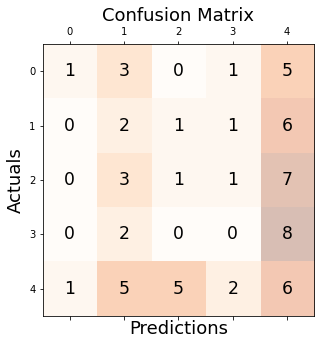

Recall: 0.164
Precision: 0.164
F1 Score: 0.164
Accuracy: 0.164


In [44]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_NB)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Recall: %.3f' % recall_score(y_test, y_pred_NB,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred_NB,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_NB,average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_NB))

In [45]:
from sklearn.svm import SVC
svm=SVC(kernel="linear",C=0.025,random_state=101)
svm.fit(X_train,y_train)
y_pred_SVC=svm.predict(X_test)
print(y_pred_SVC)

['extraverted' 'responsible' 'lively' 'responsible' 'extraverted'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'responsible'
 'serious' 'extraverted' 'extraverted' 'lively' 'extraverted'
 'extraverted' 'lively' 'extraverted' 'extraverted' 'extraverted' 'lively'
 'serious' 'extraverted' 'serious' 'extraverted' 'extraverted' 'serious'
 'lively' 'serious' 'serious' 'extraverted' 'serious' 'extraverted'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'extraverted'
 'extraverted' 'lively' 'serious' 'lively' 'responsible' 'serious'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'extraverted'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'extraverted'
 'extraverted' 'serious' 'lively' 'extraverted' 'extraverted'
 'extraverted' 'extraverted']


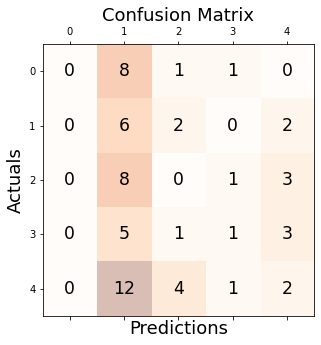

Recall: 0.148
Precision: 0.148
F1 Score: 0.148
Accuracy: 0.148


In [47]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_SVC)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Recall: %.3f' % recall_score(y_test, y_pred_SVC,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred_SVC,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_SVC,average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_SVC))

In [48]:
rfm=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
rfm.fit(X_train,y_train)
y_pred_rfm=rfm.predict(X_test)
print(y_pred_rfm)

['extraverted' 'responsible' 'lively' 'extraverted' 'dependable'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'serious'
 'serious' 'extraverted' 'extraverted' 'lively' 'lively' 'extraverted'
 'responsible' 'extraverted' 'extraverted' 'lively' 'lively' 'lively'
 'serious' 'lively' 'extraverted' 'extraverted' 'lively' 'lively' 'lively'
 'lively' 'extraverted' 'serious' 'extraverted' 'extraverted'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'lively' 'lively'
 'responsible' 'lively' 'serious' 'lively' 'extraverted' 'extraverted'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'extraverted'
 'extraverted' 'extraverted' 'extraverted' 'extraverted' 'lively' 'lively'
 'extraverted' 'extraverted' 'extraverted' 'serious']


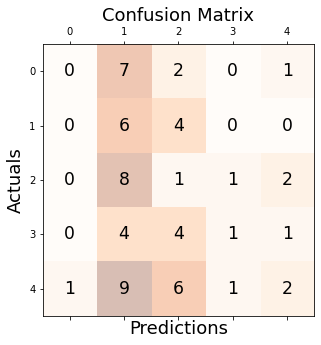

Recall: 0.164
Precision: 0.164
F1 Score: 0.164
Accuracy: 0.164


In [50]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rfm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Recall: %.3f' % recall_score(y_test, y_pred_rfm,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred_rfm,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_rfm,average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_rfm))

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred_dtc = clf.predict(X_test)

print(y_pred_dtc)
clf.score(X_test,y_test)

['dependable' 'dependable' 'serious' 'dependable' 'dependable'
 'extraverted' 'serious' 'responsible' 'serious' 'dependable'
 'responsible' 'serious' 'extraverted' 'extraverted' 'extraverted'
 'dependable' 'responsible' 'responsible' 'responsible' 'dependable'
 'serious' 'responsible' 'responsible' 'responsible' 'lively'
 'responsible' 'lively' 'extraverted' 'extraverted' 'lively' 'lively'
 'lively' 'dependable' 'extraverted' 'extraverted' 'dependable'
 'responsible' 'dependable' 'extraverted' 'dependable' 'dependable'
 'lively' 'dependable' 'extraverted' 'serious' 'dependable' 'responsible'
 'dependable' 'serious' 'extraverted' 'dependable' 'serious' 'serious'
 'serious' 'responsible' 'extraverted' 'extraverted' 'lively' 'dependable'
 'dependable' 'dependable']


0.21311475409836064

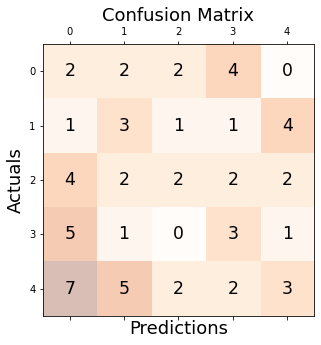

Recall: 0.213
Precision: 0.213
F1 Score: 0.213
Accuracy: 0.213


In [56]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_dtc)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Recall: %.3f' % recall_score(y_test, y_pred_dtc,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred_dtc,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_dtc,average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_dtc))

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))
#print(classification_report(y_test,y_pred_logistic))
print(classification_report(y_test,y_pred_NB))
print(classification_report(y_test,y_pred_SVC))
print(classification_report(y_test,y_pred_rfm))
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

  dependable       0.14      0.20      0.17        10
 extraverted       0.06      0.10      0.08        10
      lively       0.00      0.00      0.00        12
 responsible       0.40      0.20      0.27        10
     serious       0.38      0.32      0.34        19

    accuracy                           0.18        61
   macro avg       0.20      0.16      0.17        61
weighted avg       0.22      0.18      0.19        61

              precision    recall  f1-score   support

  dependable       0.50      0.10      0.17        10
 extraverted       0.13      0.20      0.16        10
      lively       0.14      0.08      0.11        12
 responsible       0.00      0.00      0.00        10
     serious       0.19      0.32      0.24        19

    accuracy                           0.16        61
   macro avg       0.19      0.14      0.13        61
weighted avg       0.19      0.16      0.15        61

              precisio

C:\Users\arifa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arifa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arifa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l2")
clf = clf.fit(X_train,y_train)

y_pred_SGD = clf.predict(X_test)
print(y_pred_SGD)
clf.score(X_test,y_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_SGD)))

['responsible' 'responsible' 'lively' 'responsible' 'responsible'
 'responsible' 'responsible' 'responsible' 'responsible' 'responsible'
 'lively' 'responsible' 'responsible' 'responsible' 'responsible'
 'responsible' 'responsible' 'responsible' 'lively' 'responsible'
 'responsible' 'responsible' 'responsible' 'responsible' 'responsible'
 'responsible' 'lively' 'responsible' 'responsible' 'lively' 'responsible'
 'responsible' 'responsible' 'responsible' 'responsible' 'responsible'
 'extraverted' 'responsible' 'responsible' 'responsible' 'responsible'
 'responsible' 'responsible' 'lively' 'extraverted' 'extraverted'
 'responsible' 'responsible' 'responsible' 'responsible' 'responsible'
 'responsible' 'extraverted' 'responsible' 'responsible' 'responsible'
 'responsible' 'responsible' 'extraverted' 'responsible' 'responsible']
Accuracy: 0.18
